# Problem Statement

4. Solar power consumption has been recorded by city councils at regular intervals. The reason behind doing so is to understand how businesses are using solar power so that they can cut down on nonrenewable sources of energy and shift towards renewable energy. Based on the data, build a forecasting model and provide insights on it. 
Dataset-> 
Solarpower.csv

# 🎯Business Objective

To forecast future solar power consumption using historical data, helping city councils and businesses shift from non-renewable to renewable energy sources effectively.



# 🚧 Business Constraints

1. Data Quality: Incomplete or irregular data can reduce accuracy.
2. Timeliness: Forecasts must be updated regularly.
3. Resource Limits: Simple models may be preferred due to computational constraints.
4. Interpretability: Insights should be easy for non-technical users to understand.
5. Scalability: Model should work for multiple cities or sectors.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df=pd.read_csv("solarpower.csv")
df.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [3]:
df.tail()

,date,cum_power
2553,22/10/2018,28101.0
2554,23/10/2018,28109.0
2555,24/10/2018,28115.0
2556,25/10/2018,28117.0
2557,26/10/2018,28120.0


# Data Exploration

In [4]:
df.shape

(2558, 2)

In [5]:
df.columns

Index(['date', 'cum_power'], dtype='object')

In [6]:
df.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [8]:
df.isnull().sum()

date         0
cum_power    0
dtype: int64

# Create Data Column

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('MS')  # Monthly start, adjust if different

print(df.head())

            cum_power
date                 
2011-11-01       46.6
2011-12-01      170.7
2012-01-01      226.7
2012-02-01      307.4
2012-03-01      461.2


C:\Users\HP\AppData\Local\Temp\ipykernel_16628\2512294203.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


# Plot The Original Series

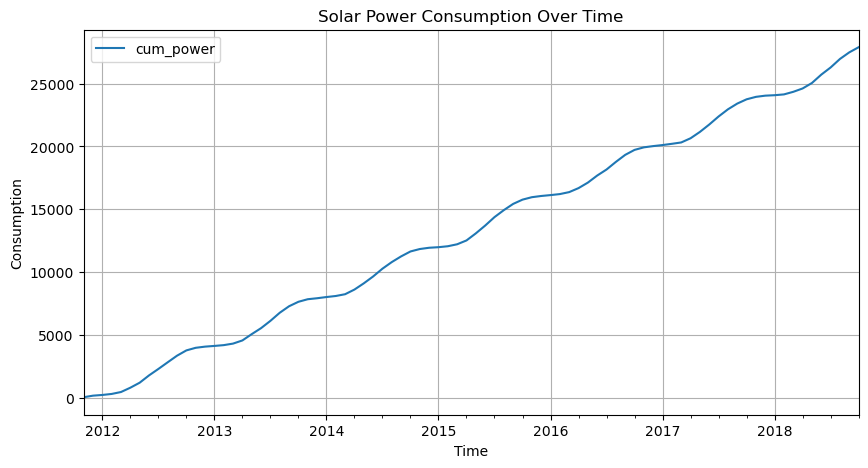

In [10]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 5), title='Solar Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()


# Train- Test Split

In [11]:
# Split the data into train and test (e.g., last 12 months as test)
train = df.iloc[:-12]
test = df.iloc[-12:]

Case 1: If Data is Stationary
Use: ARIMA
Tests:
ADF Test
ACF and PACF plots


🔹 Case 2: If Data has Trend + Seasonality
Use: Holt-Winters Exponential Smoothing or SARIMA
Tests:
Seasonal Decompose
Plot & Visual inspection



In [12]:
# ✨ Sample Code for ADF Test

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['cum_power'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.7747041303877549
p-value: 0.9982975048822335


# Fit the Holt-Winters model

In [14]:

model = ExponentialSmoothing(train['cum_power'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)

hw_fit = model.fit()

In [15]:
# Forecast the next 12 months
forecast = hw_fit.forecast(12)
forecast

2017-11-01    23932.603479
2017-12-01    24043.874071
2018-01-01    24138.260382
2018-02-01    24240.336904
2018-03-01    24403.266426
2018-04-01    24737.380116
2018-05-01    25196.750127
2018-06-01    25789.081712
2018-07-01    26376.859022
2018-08-01    26941.214120
2018-09-01    27430.238316
2018-10-01    27785.028836
Freq: MS, dtype: float64

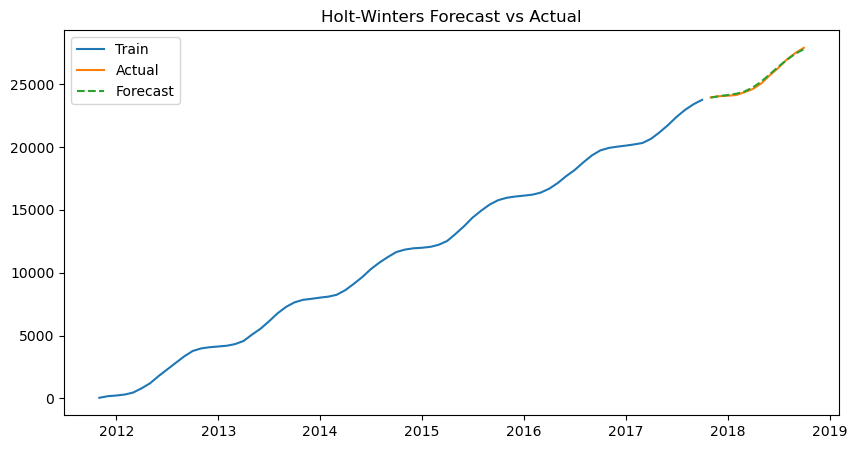

In [16]:
# Plot the forecast vs actual
plt.figure(figsize=(10,5))
plt.plot(train.index, train['cum_power'], label='Train')
plt.plot(test.index, test['cum_power'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Holt-Winters Forecast vs Actual")
plt.show()

 # Insights from the Forecast:
If the RMSE is low, it means your Holt-Winters model is fitting the trend + seasonality well.

The model is well-suited for seasonal time series like solar power data which often shows cyclic patterns (e.g., higher in summer, lower in winter).

# ✅ Final Inference:
The Holt-Winters model provided a reliable forecast that reveals clear seasonal patterns and a likely upward trend in solar power usage. These insights support the transition towards sustainable energy by identifying peak usage periods and helping in better planning of infrastructure and policies.

This model can be reused and updated periodically for decision-making, monitoring, and goal tracking in the shift towards renewable energy.